# <u> Model_Benchmarking</u>

This notebook generates all visualizations and tables for the PDF report available in the main folder. The purpose is generative rather than explanatory, as detailed analysis and methodology are covered in the individual project notebooks and synthesized in the final report.

## <u>0. Setup </u>

In [2]:
import matplotlib.pyplot as plt
import numpy as np, os, sys

# Set the working directory
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)


## <u> 1. Model comparison </u>

### <u> Table of Results: </u>

<table border="1" cellpadding="5" cellspacing="0" style="text-align: center;">
  <tr>
    <th>Model Category</th>
    <th>Model Name</th>
    <th>Validation RMSE</th>
    <th colspan="3">Test RMSE</th>
    <th>Elapsed Time (s)</th>
  </tr>
  <tr>
    <th></th>
    <th></th>
    <th>Total</th>
    <th>Total</th>
    <th>Warm</th>
    <th>Cold</th>
    <th></th>
  </tr>
  <tr>
    <td>Content-based</td>
    <td>Content Filtering</td>
    <td>0.8865</td>
    <td>0.9014</td>
    <td>0.9002</td>
    <td>0.9193</td>
    <td><b>12.5</b></td>
  </tr>
  <tr>
    <td>Memory-based CF</td>
    <td>User-User</td>
    <td>0.8748</td>
    <td>0.8946</td>
    <td>0.8876</td>
    <td>1.0062</td>
    <td>248.9</td>
  </tr>
  <tr>
    <td>Memory-based CF</td>
    <td>Item-Item</td>
    <td>0.8462</td>
    <td>0.8927</td>
    <td>0.8851</td>
    <td>1.0127</td>
    <td>238.8</td>
  </tr>
  <tr>
    <td>Model-based CF</td>
    <td>Funk SVD</td>
    <td>0.8128</td>
    <td>0.8355</td>
    <td>0.8309</td>
    <td>0.9105</td>
    <td>30.5</td>
  </tr>
  <tr>
    <td>Hybrid</td>
    <td>Hybrid NN</td>
    <td><b>0.6546</b></td>
    <td><b>0.8317</b></td>
    <td><b>0.8282</b></td>
    <td><b>0.8880</b></td>
    <td>50.2</td>
  </tr>
</table>

### <u> Bar Plot Results: </u>

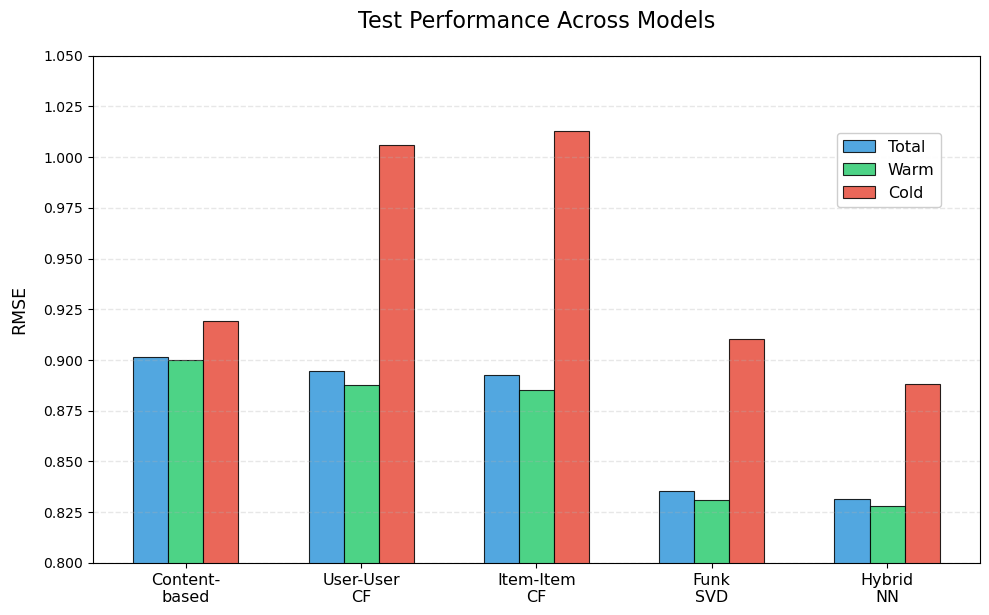

In [40]:
# Data for plotting
models = ['Content-\nbased', 'User-User\nCF', 'Item-Item\nCF', 'Funk\nSVD', 'Hybrid\nNN']
test_total = [0.9014, 0.8946, 0.8927, 0.8355, 0.8317]
test_warm = [0.9002, 0.8876, 0.8851, 0.8309, 0.8282]
test_cold = [0.9193, 1.0062, 1.0127, 0.9105, 0.8880]

# Bar plot 
x = np.arange(len(models))
width = 0.2
fig, ax = plt.subplots(figsize=((10, 6.25)))

# Create bars
bars1 = ax.bar(x - width, test_total, width, label='Total', 
               color="#3498db", alpha=0.85, edgecolor='black', linewidth=0.8)
bars2 = ax.bar(x, test_warm, width, label='Warm', 
               color='#2ecc71', alpha=0.85, edgecolor='black', linewidth=0.8)
bars3 = ax.bar(x + width, test_cold, width, label='Cold', 
               color="#e74c3c", alpha=0.85, edgecolor='black', linewidth=0.8)

ax.set_ylabel('RMSE', fontsize=12.5, labelpad=11)
ax.set_title('Test Performance Across Models', fontsize=16, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11.5)
ax.legend(fontsize=11.5, bbox_to_anchor=(0.965, 0.863), framealpha=0.95)
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
ax.set_yticks(np.arange(0.70, 1.06, 0.025))
ax.set_ylim([0.8, 1.05])


plt.tight_layout()
plt.savefig('../notebooks/images/model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()